<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/main/pix2pix(drones_day2night).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 23.12 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [3]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=1bd345bcf1435c575a1b3b583bd7e4f0456832fe02818a8a80e7c4fc60653ba6
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [5]:
!bash ./datasets/download_pix2pix_dataset.sh night2day

Streaming output truncated to the last 5000 lines.
night2day/train/90_7568_to_7558.jpg
night2day/train/90_7568_to_7560.jpg
night2day/train/90_7568_to_7561.jpg
night2day/train/90_7568_to_7562.jpg
night2day/train/90_7568_to_7564.jpg
night2day/train/90_7568_to_7566.jpg
night2day/train/90_7618_to_7603.jpg
night2day/train/90_7618_to_7604.jpg
night2day/train/90_7618_to_7605.jpg
night2day/train/90_7618_to_7606.jpg
night2day/train/90_7618_to_7607.jpg
night2day/train/90_7618_to_7609.jpg
night2day/train/90_7618_to_7611.jpg
night2day/train/90_7618_to_7612.jpg
night2day/train/90_7618_to_7613.jpg
night2day/train/90_7618_to_7614.jpg
night2day/train/90_7618_to_7617.jpg
night2day/train/90_7618_to_7619.jpg
night2day/train/90_7618_to_7620.jpg
night2day/train/90_7618_to_7621.jpg
night2day/train/90_7618_to_7622.jpg
night2day/train/90_7618_to_7624.jpg
night2day/train/90_7623_to_7546.jpg
night2day/train/90_7623_to_7547.jpg
night2day/train/90_7623_to_7548.jpg
night2day/train/90_7623_to_7549.jpg
night2day/tra

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [6]:
!bash ./scripts/download_pix2pix_model.sh day2night

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [day2night]
for details.

--2024-01-12 14:21:04--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘./checkpoints/day2night_pretrained/latest_net_G.pth’

./checkpoints/day2n 100%[===================>] 207.62M  52.8MB/s    in 7.1s    

2024-01-12 14:21:11 (29.1 MB/s) - ‘./checkpoints/day2night_pretrained/latest_net_G.pth’ saved [217710797/217710797]



In [7]:
!cp -r /content/pytorch-CycleGAN-and-pix2pix/datasets/night2day /content/drive/MyDrive

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [12]:
!python train.py --dataroot ./datasets/night2day --name day2night_pix2pix --model pix2pix --direction BtoA --display_id -1 --gpu_ids 0 --batch_size 16 --epoch_count 195


----------------- Options ---------------
               batch_size: 16                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/night2day          	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: lat

In [31]:
!python test.py --dataroot /content/drive/MyDrive/day2night/drone_images --direction BtoA --model pix2pix --name day2night_pix2pix

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/day2night/drone_images	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [32]:
!ls checkpoints/

day2night_pix2pix  day2night_pretrained  drones_pix2pix  facades_pix2pix  night2day_pix2pix


# Visualize

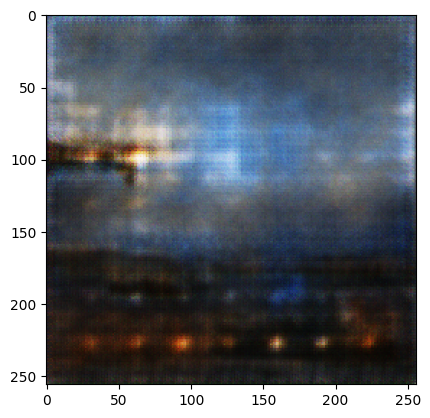

In [35]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/day2night_pix2pix/test_latest/images/FDqCd3gXMAQSy2q_fake_B.png')
plt.imshow(img)

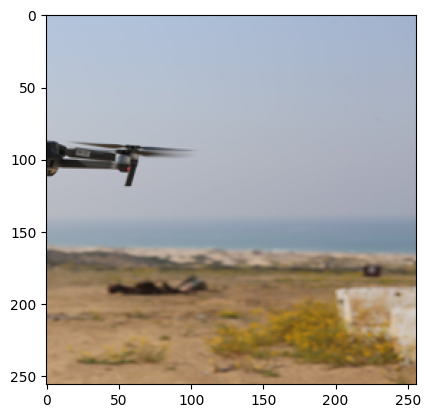

In [36]:
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/day2night_pix2pix/test_latest/images/FDqCd3gXMAQSy2q_real_A.png')
plt.imshow(img)

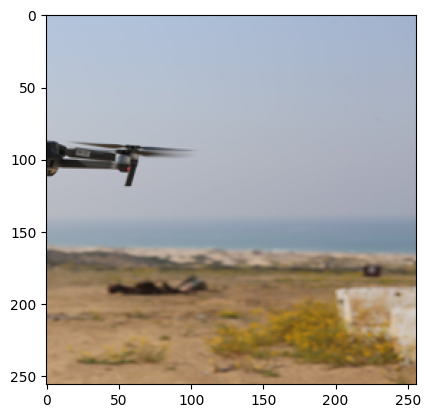

In [37]:
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/day2night_pix2pix/test_latest/images/FDqCd3gXMAQSy2q_real_A.png')
plt.imshow(img)